* 이챕터에선 지도학습인 회귀와 분류에 집중할것으로, 모델 평가와 매개변수 선택에 대해 더 자세히 배워본다.
* 모델이 훈련셋에 잘 맞는것 보다, 학습과정에 없던 데이터에 대해 예측을 얼마나 잘하냐가 중요하기 때문에,
* 두가지 관점에서 평과 방법을 확장한다 1. 일반화 성능 측정 방식인 교차검증 2. score 메서드가 제공하는 정확도와 R^2 값 이외에 분류와 회귀성능 측정

# 5.1 교차 검증
* 일반화 성능을 재기위해, 데이터를 여러번 반복해서 나누고 여러모델을 학습하여 검증하는 방법 - k-겹 교차 검증
* 폴드라는 크기가 비슷한 부분 집합으로 나누고, 그중 테스트셋을 바꿔가며 학습하는 방법. 
* 만약 5개의 폴드가 생기면, 각 다섯개의 정확도 값을 얻게 되는것이다.

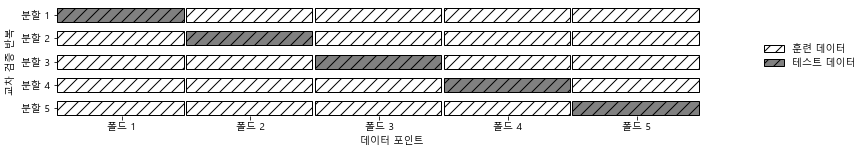

In [57]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import warnings
warnings.filterwarnings(action = 'ignore')
import mglearn
mglearn.plots.plot_cross_validation()

### 5.1.1. scikit_learn의 교차 검증
* scikit_learn에서 교차검증은 cross_val_score 함수로 구현된다. iris 데어테셋에 적용한 Logistic Regression 평가 해보기 

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 :', scores)

교차 검증 점수 : [0.96078431 0.92156863 0.95833333]


* 여기선 cross_val_score가 3-겹 교차 검증을 하였다 -기본값. 폴드의 수는 cv 매개변수로 변경한다.

In [59]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print('교차 검증 점수 :', scores)

print('교차 검증 평균 점수 :{:.2f}'.format(scores.mean()))

교차 검증 점수 : [1.         0.96666667 0.93333333 0.9        1.        ]
교차 검증 평균 점수 :0.96


* 최소 5겹은 사용하는것이 좋으며, 교차검증의 정확도는 평균을 사용해 나타낼수 있다. 
* 폴드에 따라 비교적 스코어에 대한 차이가 큰데, 모델에 사용된 폴드에 매우 의존적이거나 데이터셋이 작기 떄문.
* 교차검증에 cross_validate 함수를 사용해 분할마다 훈련과 테스트에 걸린 시간을 담는 딕셔너리를 반환해준다. 

In [60]:
from sklearn.model_selection import cross_validate
res=cross_validate(logreg,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.00099969, 0.00099945, 0.00099921, 0.00099897, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [61]:
import pandas as pd 
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 :\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.001000,0.0,1.000000,0.950000
1,0.000999,0.0,0.966667,0.966667
2,0.000999,0.0,0.933333,0.966667
3,0.000999,0.0,0.900000,0.975000
4,0.000000,0.0,1.000000,0.958333


평균 시간과 점수 :
 fit_time       0.000799
score_time     0.000000
test_score     0.960000
train_score    0.963333
dtype: float64


< 교차 검증의 장점 >

데이터를 훈련 세트와 테스트 세트로 한 번 나누는 것보다 교차 검증을 사용하면 몇 가지 장점이있다.

먼저 train_test_split는 데이터를 무작위로 나눈다.
데이터를 무작위로 나눌 떄 운좋게 훈련 세트에는 분류하기 어려운 샘플만 담기게 되었다고 생각해보자.

이 경우 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트의 정확도는 비현실적으로 높게 나올 수 있다.

교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어간다.
각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 된다.
그러기 때문에 모든 샘플에 대해 모델이 잘 일반화 된다.

train_test_split를 사용하면 보통 데이터 중 75%를 훈련세트로 사용하고 25%를 평가에 사용하낟.
5-겹 교차 검증을 사용하면 매 반복에서 80%의 데이터를 모델 학습에 사용한다.
이는 보통 더 정확한 모델을 만들어 낸다.

교차 검증의 주요 단점은 연산 비용이 늘어난다.
모델을 k개 만들어야 하므로 데이터를 한 번 나눴을 때 보다 대략 k배 더 느리다.

### 5.1.3  계층별 k-겹 교차검증
* iris 데이터 셋의 경우, target의 그룹이 폴드로 나눠진다할때 각 폴드에 0,1,2 만 속해 있는 경우가 발생하게 된다. 이러한 경우에는 단순한 k-겹 교차검증에 문제가 있기 때문에,이런 경우 계층별 k-겹 교차검증을 사용해야 한다. 

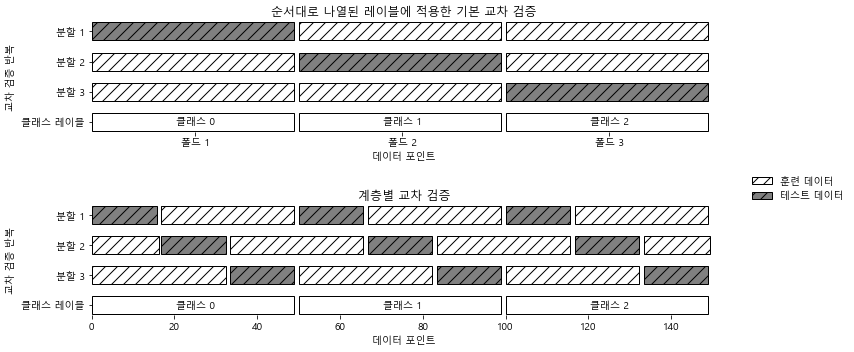

In [62]:
mglearn.plots.plot_stratified_cross_validation()

* 대부분의 경우 회귀에서는 k-겹, 분류에서는 계층별 k-겹 교차검증이 잘작동하나. 
* 분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차 검증을 사용하는 것이 좋다.

### 교차 검증 상세 옵션 

In [63]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5) # KFold 객체 생성
logreg = LogisticRegression() # 모델 객체 생성

for n in [3, 5]:
    kfold = KFold(n_splits=n)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0. 0. 0.]
n_splits=5, cross validation score: [1.         0.93333333 0.43333333 0.96666667 0.43333333]


* 다음과 같이, 폴드갯수를 지정하는 kFold객체를 생성하여 원하는 폴드의 갯수를 넘겨 줄 수 있다. 하지만 iris데이터셋의 target이 0,1,2 세개의 클래스를 지니고있어, 폴드수가 3개인경우 전혀 검증이 안된다. 

In [64]:
for n in [3, 5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.9  0.96 0.96]
n_splits=5, cross validation score: [0.96666667 0.9        0.96666667 0.96666667 0.93333333]


* 따라서 shuffle 옵션에 True를 넣어주어 데이터를 섞어서 샘플의 순서를 뒤죽박죽으로 만들어준다. 데이터를 분할하기 전에 섞어주면 결과가 더 좋게 나올 수 있다. 

### LOOCV
* 폴드하나에 샘플 하나만 들어 있는 k-겹 교차검증으로 생각할 수 있는 검증방법이다. 
* 각 반복에서 하나의 데이터 포인트를 선택에 테스트 셋으로 사용하는데,
* 데이터 셋이 클때는 시간이 매우 오래 걸리지만 작은 데이터셋에서는 이따금 더 좋은 결과를 내기도한다. 

In [65]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
iris = load_iris()
loo = LeaveOneOut()
scores_loo = cross_val_score(logreg, iris.data, iris.target, cv=loo) 

print('iris.data.shape \n{}'.format(iris.data.shape))
print('교차 검증 분할 횟수 \n{}'.format(len(scores_loo)))
print('평균 정확도 \n{:.3f}'.format(scores_loo.mean()))

iris.data.shape 
(150, 4)
교차 검증 분할 횟수 
150
평균 정확도 
0.953


### 임의 분할 교차 검증 
* train_size만큼의 포인트로 훈련 셋을 만들고, test_size만큼의 포인트로 테스트 셋을 만들도록 불할하는 방법. 
* 이 분할은 n_splits 횟수 만큼 반복된다. 


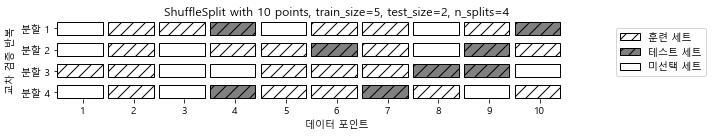

In [66]:
mglearn.plots.plot_shuffle_split()

In [67]:
from sklearn.model_selection import ShuffleSplit
# create object
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10) # ShuffleSplit 객체 생성
# cv test
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
# cv test result
print('교차 검증 점수 \n{}'.format(scores))
print('교차 검증 점수 \n{}'.format(scores.mean()))

교차 검증 점수 
[0.97333333 0.92       0.96       0.96       0.92       0.96
 0.92       0.94666667 0.88       0.70666667]
교차 검증 점수 
0.9146666666666668


* 이런 경우, 데이터셋의 50프로를 훈련셋, 남은 50을 테스트 셋으로 10번 반복하여 분할해 검증한 결과이다. 
* 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할때 유용함
* 또한 train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용할 수 있음
* 이렇게 데이터를 subsampling부분 샘플링방식은 대규모 데이터셋으로 작업할 때 유용함

### 그룹별 교차 검증 
* 얼굴 사진에서 표정을 인식하는 시스템을 만들기위해 100명의 사진을 모았다,
* 이데이터셋에 없는 사람의 표정을 정확히 구분하는 분류기를 만들려면
* 훈련 셋과 테스트 셋에 서로 다른 사람의 사진이 들어가도록 해야한다. 

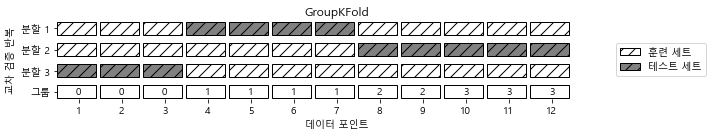

In [68]:
mglearn.plots.plot_group_kfold()

In [69]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold
x, y = make_blobs(n_samples=12, random_state=0)
gkfold = GroupKFold(n_splits=3) # GroupKFold
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] # group class
# cv test
scores = cross_val_score(logreg, x, y, groups, cv=gkfold)
# cv test result
print('교차검증 점수 \n{}'.format(scores))

교차검증 점수 
[0.75       0.8        0.66666667]


## 5.2 그리드 서치 

* 그리드 서치 매개변수를 튜닝하여 일반화 성능을 높이는 것이 목표입니다. 가장 널리 사용하는 방법은 grid search그리드 서치 이며 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것 입니다

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = \
  train_test_split(iris.data, iris.target,
                    random_state=0)
print('훈련 세트의 크기 :{}, 테스트 세트의 크기:{}'.format(X_train.shape, X_test.shape))

훈련 세트의 크기 :(112, 4), 테스트 세트의 크기:(38, 4)


In [71]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
print('best score ==> {:.3f}'.format(best_score))

print('best parameter ==> {}'.format(best_param))

best score ==> 0.974
best parameter ==> {'C': 100, 'gamma': 0.001}


grid search를 통해 C=100, gamma: 0.001일 때 가장 좋은 결과가 나온 것을 확인할 수 있습니다.
이 결과를 보면 이 데이터셋에서 모델 정확도가 97.8%라고 보고할 수 있습니다.
하지만 이런 주장은 다음과 같은 이유로 잘못될 수도 있습니다.

1. 이 정확도는 새로운 데이터까지 이어지지 않을 수 있습니다.
매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 테스트세트는 모델이 얼마나 좋은지 평가하는 데 사용할 수 없습니다.
즉 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요하고 
다음 장에서 독립된 데이터셋을 다루는 방법을 살펴보겠습니다.

모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요하다고 했습니다.

독립된 데이터셋을 사용하는 방법에는 2가지가 있습니다.

첫 번째는 train_test_split을 2번 사용하여 데이터를 3등분하는 것이고

두 번째는 cross-validation을 사용하는 것입니다.

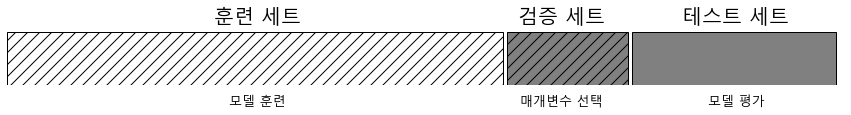

In [72]:
mglearn.plots.plot_threefold_split()

In [73]:
from sklearn.svm import SVC
iris = load_iris()
X_trainval, X_test, y_trainval, y_test=  train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)  
print('훈련 세트의 크기:{}\n검증 세트의 크기:{}\n테스트 세트의 크기:{}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기:84
검증 세트의 크기:28
테스트 세트의 크기:38


In [74]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
print('best score ==> {:.3f}'.format(best_score))
print('best parameter ==> {}'.format(best_param))

best score ==> 0.964
best parameter ==> {'C': 10, 'gamma': 0.001}


In [75]:
#훈련세트와 검증세트를 합쳐 모델을 다시 만든후
#테스트 세트를 사용해 평가한다
svm=SVC(**best_param).fit(X_trainval, y_trainval)
test_score=svm.score(X_test,y_test)
print('최적 매개변수 점수 ==> {:.3f}'.format(best_score))
print('최적 매개변수 ==> {}'.format(best_param))
print('최적 매개변수에서 test ==> {:.3f}'.format(test_score))

최적 매개변수 점수 ==> 0.964
최적 매개변수 ==> {'C': 10, 'gamma': 0.001}
최적 매개변수에서 test ==> 0.921


최적 매개변수에서 최고점수는 96.4%이며 테스트 세트 점수는 92.1%입니다. 
즉 새로운 데이터에 대해 92.1%만 정확하게 분류한다고 볼 수 있습니다.
테스트 세트로 둘 이상의 모델을 평가해서 그 중 더 나은 하나를 선택하는 것은 모델의 정확도를 매우 낙관적으로 추정하거나, overfitting이 생길 수 있으므로 주의해야합니다.

cross-validaion을 이용한 iris데이터의 grid search

일반화 성능을 더 잘 평가하려면 훈련 세트와 검증 세트를 한 번만 나누지 않고 
cross-validation을 사용해서 각 매개변수 조합의 성능을 평가할 수 있습니다.
cross-validation을 통해 어떤 매개변수가 선택되는지를 살펴보면

In [76]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수의 각 조합에 대해SVC를 훈련시킵니다
        svm=SVC(gamma=gamma, C=C)
        scores =cross_val_score(svm,X_trainval, y_trainval,cv=5)
        score=np.mean(scores)
        if score > best_score:
            best_score = score
            best_param = {'C':C, 'gamma':gamma}
svm=SVC(**best_param)
svm.fit(X_trainval,y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

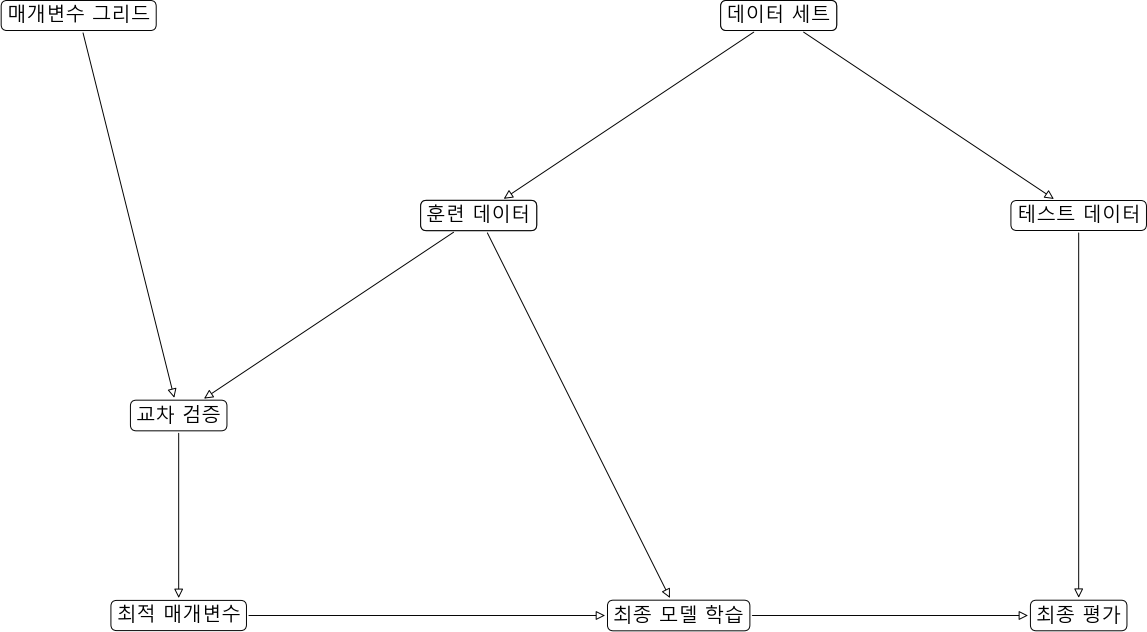

In [77]:
mglearn.plots.plot_grid_search_overview()

cross-validation을 사용한 grid search를 매개변수 조정 방법으로 많이 사용하기 때문에
scikit-learn은 GridSearchCV를 제공합니다.
GridSearchCV는 딕셔너리 형태로 검색 대상 매개변수를 지정하며 필요한 모든 모델을 학습합니다. 아래 소스는 위의 소스와 같은 결과를 냅니다.

In [78]:
param_grid={"C":[0.001, 0.01, 0.1, 1, 10, 100],
            "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드: \n",param_grid)

매개변수 그리드: 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=0)
grid_search.fit(X_train,y_train)
print("트레인 세트 점수 : {:.2f}".format(grid_search.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(grid_search.score(X_test,y_test)))

print("최적 매개변수:",grid_search.best_params_)
print("최고 교차 검증 점수:",grid_search.best_score_)

print("최고 성능 모델:",grid_search.best_estimator_)

트레인 세트 점수 : 0.98
테스트 세트 점수 : 0.97
최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.9732142857142857
최고 성능 모델: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## 5.3 평가 지표와 측정 

### 불균형 데이터셋 

In [80]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target ==9

X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state=0)

* 항상 다수의 클래스(9가 아닌)를 예측값으로 내놓는 DummyClassifier 를 사용해 정확도 계산

In [81]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 레이블의 고유값 : ', np.unique(pred_most_frequent))
print('테스트 점수:{:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값 :  [False]
테스트 점수:0.90


In [82]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth =2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수:{:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수:0.92


In [83]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수:{:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수:0.80
logreg 점수 : 0.98


* 이러한 더미분류기의 로우스코어와 다른 모델들의 하이스코어가 실제로 유용한 건지 판단하기가 모시 어렵다. 
* 불균형 데이터셋에서 예측 성능을 정량화 하는데 정확도는 적절한 측정 방법이 아니기 때문이다. 
* 모델 선택을 도와주는 다른 지표를 더욱 살펴보가로 한다. 특히 빈도나 무작위 기반 예측보다 얼마나 더나은지 알려주는 평가지표가 필요하다. 
* 모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야한다. 
* 정확도 - 모든 데이터에 대해 클래스 라벨을 얼마나 정확히 맞췄는가?

## 오차 행렬
* 오차행렬은 binary classfier 평가 결과를 나타낼 때 가장 많이 사용한다.
* LogistinRegression의 예측결과를 오차행렬 함수를 사용해 나타내보자,

In [84]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 :\n', confusion)

오차 행렬 :
 [[401   2]
 [  8  39]]


* 각 행은 정답클래스에 해당하고, 열은 예측클래스에 해당한다. 각 항목의 숫자는 행에 해당하는 클래스가 얼마나 많이 열에 해당하는 클래스로 분류되었는지 나타낸다.

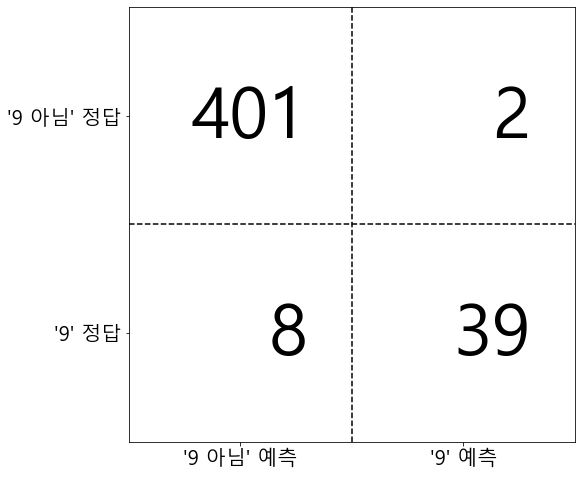

In [85]:
mglearn.plots.plot_confusion_matrix_illustration()

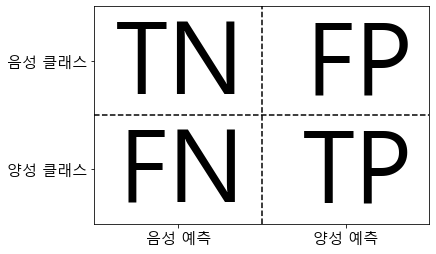

In [86]:
mglearn.plots.plot_binary_confusion_matrix()

* 이러한 오차행렬로 앞서 만든 모델들 비교해보기 

In [87]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n 무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print('\n 결정 트리 모델:')
print(confusion_matrix(y_test, pred_tree))
print('\n 로지스틱 회귀 모델:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

 무작위 더미 모델:
[[363  40]
 [ 41   6]]

 결정 트리 모델:
[[390  13]
 [ 24  23]]

 로지스틱 회귀 모델:
[[401   2]
 [  8  39]]


* pred_most_frequent에선 항상 동일한 클래스를 예측해서 잘못됫다 볼수있다. 
* 각각의 모델에 대한 오차행렬을 살펴보는것은 너무 수동적이고 정성적이니
* 다음절에서 오차행렬 정보를 요약할 수 있는 여러 방법을 살펴보겟다.

## 정확도와의 관계 
* 정확도로 결과를 요약해보자! 
* 정확도 = (TP+TN)/(TP+TN+FP+FN) -> 정확히 예측한 수를 전체 샘플 수로 나눈 것

## 정밀도, 재현율, f_점수
* 정밀도  =(TP)/(TP+FP) 양성으로 예측된 것중 얼마나 많은 샘플이 양성인가? 
* 정밀도는 거짓 양성의 수를 줄이는 것이 목표일 때 성능 지표로 사용된다. 양성 예측도 라고도 한다. 
* 재현율 - TP/(TP+FN) - 전체 양성 샘플 중, 얼마나 많은 샘플이 양성클래스로 분류 되는가?
* 재현율은 모든 양성 샘플을 식별해야 할 때 성능지표로 사용된다. 즉 거짓 음성(FN)을 피해야 하는 것이 중요할 때. - 민감도, 적중률, 진짜양성 비율이라고도 한다.

* 정밀도와 재현율이 매우 중요한 측정방법이나, 둘중하나만으로 전체그림을 볼수 없기에 정밀도와 재현율의 조화 평균인 f-점수를 사용한다.
* F = 2 x (정밀도 * 재현율) /(정밀도 + 재현율)
* f1 스코어는 데이터가 언발란스 할때 좋은 수치로 여거진다. 

In [88]:
from sklearn.metrics import f1_score

print('빈도 기반 더미 모델의 f1 score:{:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score:{:.2f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 score:{:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 scor:{:.2f}'.format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score:0.00
무작위 더미 모델의 f1 score:0.13
트리 모델의 f1 score:0.55
로지스틱 회귀 모델의 f1 scor:0.89


### classfication_report 함수로 정밀도, 재현율, f1-점수를 모두 한번에 계산하여 출력해준다. 

In [89]:
from sklearn.metrics import classification_report
print('빈도 기반 더미 모델의 classification_report:\n ',classification_report(y_test, pred_most_frequent, target_names =['9 아님', '9']))
print('무작위 더미 모델의 classification_report:\n ',classification_report(y_test, pred_dummy, target_names =['9 아님', '9']))
print('트리 모델의 classification_report:\n ',classification_report(y_test, pred_tree, target_names =['9 아님', '9']))
print('로지스틱 회귀 모델의 classification_report:\n ',classification_report(y_test, pred_logreg, target_names =['9 아님', '9']))

빈도 기반 더미 모델의 classification_report:
               precision    recall  f1-score   support

       9 아님       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450

무작위 더미 모델의 classification_report:
               precision    recall  f1-score   support

       9 아님       0.90      0.90      0.90       403
          9       0.13      0.13      0.13        47

avg / total       0.82      0.82      0.82       450

트리 모델의 classification_report:
               precision    recall  f1-score   support

       9 아님       0.94      0.97      0.95       403
          9       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450

로지스틱 회귀 모델의 classification_report:
               precision    recall  f1-score   support

       9 아님       0.98      1.00      0.99       403
          9       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       45

* 첫줄은 각각 정밀도, 재현율, f1_score를 출력해주고, 마지막 support는 각클래스의 지지도, 즉 이 클래스에 있는 진짜 샘플의 수이다.
* 마지막 avg/total은 단순히 클래스별 평균을 내준것. 

### 정밀도를 높이려면? - 거짓 양성을 줄이자!
### 재현율을 높이려면? - 거짓 음성을 줄이자!

## 정밀도-재현율 곡선과 ROC 곡선

In [90]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(4000,500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
svc = SVC(gamma=.05).fit(X_train,y_train)

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

## 피마 인디언 당뇨병 머신러닝 예측 모델을 수립하고, 평가 지표 적용

In [93]:
diabets = pd.read_csv('../data/228_482_bundle_archive/diabetes.csv')

In [99]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
diabets.groupby('Outcome').Outcome.count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64